# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Data

In [3]:
boombike= pd.read_csv(r"C:\Users\user\Desktop\Lending Casestudy\Linear Regression Assigment\day.csv")
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombike.shape

(730, 16)

In [5]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Identifying different variable types

On the Boombike dataset

- Only dteday is data type

- All other columns are either float or integer type.

# Missing Values

In [7]:
a = boombike.isnull().sum()

In [8]:
b = len(boombike)

In [9]:
missing_val = round((a/b)*100,2).sort_values(ascending=False)
print(missing_val)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


It seems like there is no missig values in entire dataset

# Removing Unnecessary Variables

Based on the acceptance criteria and Data preparation conditions we come to conclusion certain redundant variables are unnecessary and removed for further analysis:

- Instant
- dteday
- Casual
- registered

In [10]:
boombike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [11]:
boombike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
boombike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [13]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Successfully deleted the Redundant variables from the dataset

# Correlation between variables

we have to encode the variable as per the acceptance criteria and show the correlation between them

# Season

1. spring
2. summer
3. fall
4. winter

In [14]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
boombike['season'] = boombike['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='cnt'>

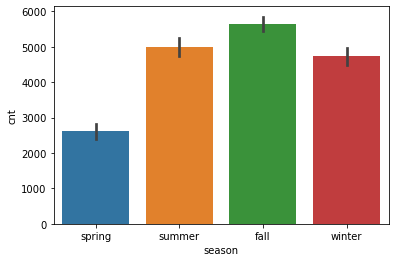

In [15]:
sns.barplot('season','cnt',data=boombike)

This graph indicates the correlation between the season and cnt where the most of bikes are rented in fall season

# Weathersit

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
boombike['weathersit'] = boombike['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

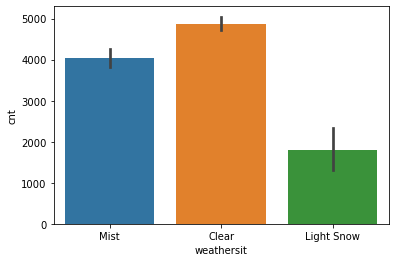

In [17]:
sns.barplot('weathersit','cnt',data=boombike)

This graph indicates the correlation between the weathersit and cnt

# Workingday

- if day is neither weekend nor holiday is 1,
- otherwise is 0

In [18]:
codes = {1:'working_day',0:'Holiday'}
boombike['workingday'] = boombike['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

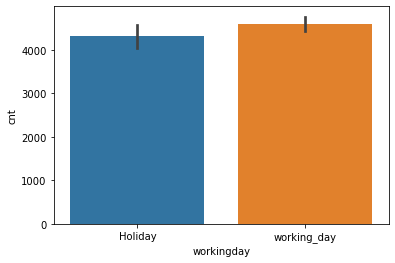

In [19]:
sns.barplot('workingday','cnt',data=boombike)

In [20]:
boombike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,5,working_day,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,6,Holiday,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,1796


# Year

- 2018:0
- 2019:1

<AxesSubplot:xlabel='yr', ylabel='cnt'>

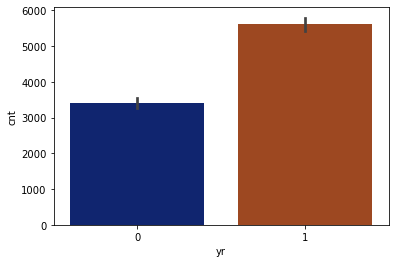

In [21]:
sns.barplot('yr','cnt',data=boombike,palette='dark')

In [22]:
boombike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,5,working_day,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,6,Holiday,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,1796


# Month

- 1:Jan
- 2:Feb
- 3:Mar
- 4:Apr
- 5:May
- 6:June
- 7:July
- 8:Aug
- 9:Sep
- 10:Oct
- 11:Nov
- 12:Dec

In [23]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
boombike['mnth'] = boombike['mnth'].map(codes)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

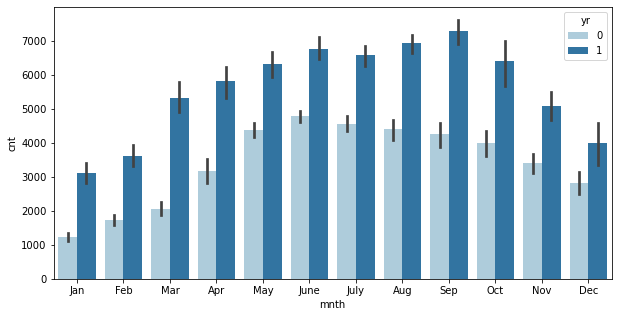

In [24]:
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=boombike,palette='Paired')

# Weekday

- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

In [25]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
boombike['weekday'] = boombike['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

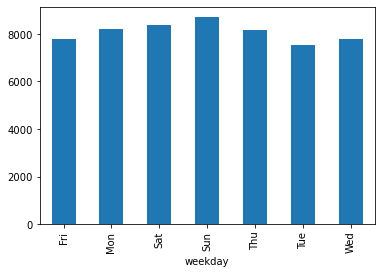

In [26]:
boombike.groupby('weekday')['cnt'].max().plot(kind='bar')

This Barchart indicates the most of the bikes are reted on the weekend

In [27]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


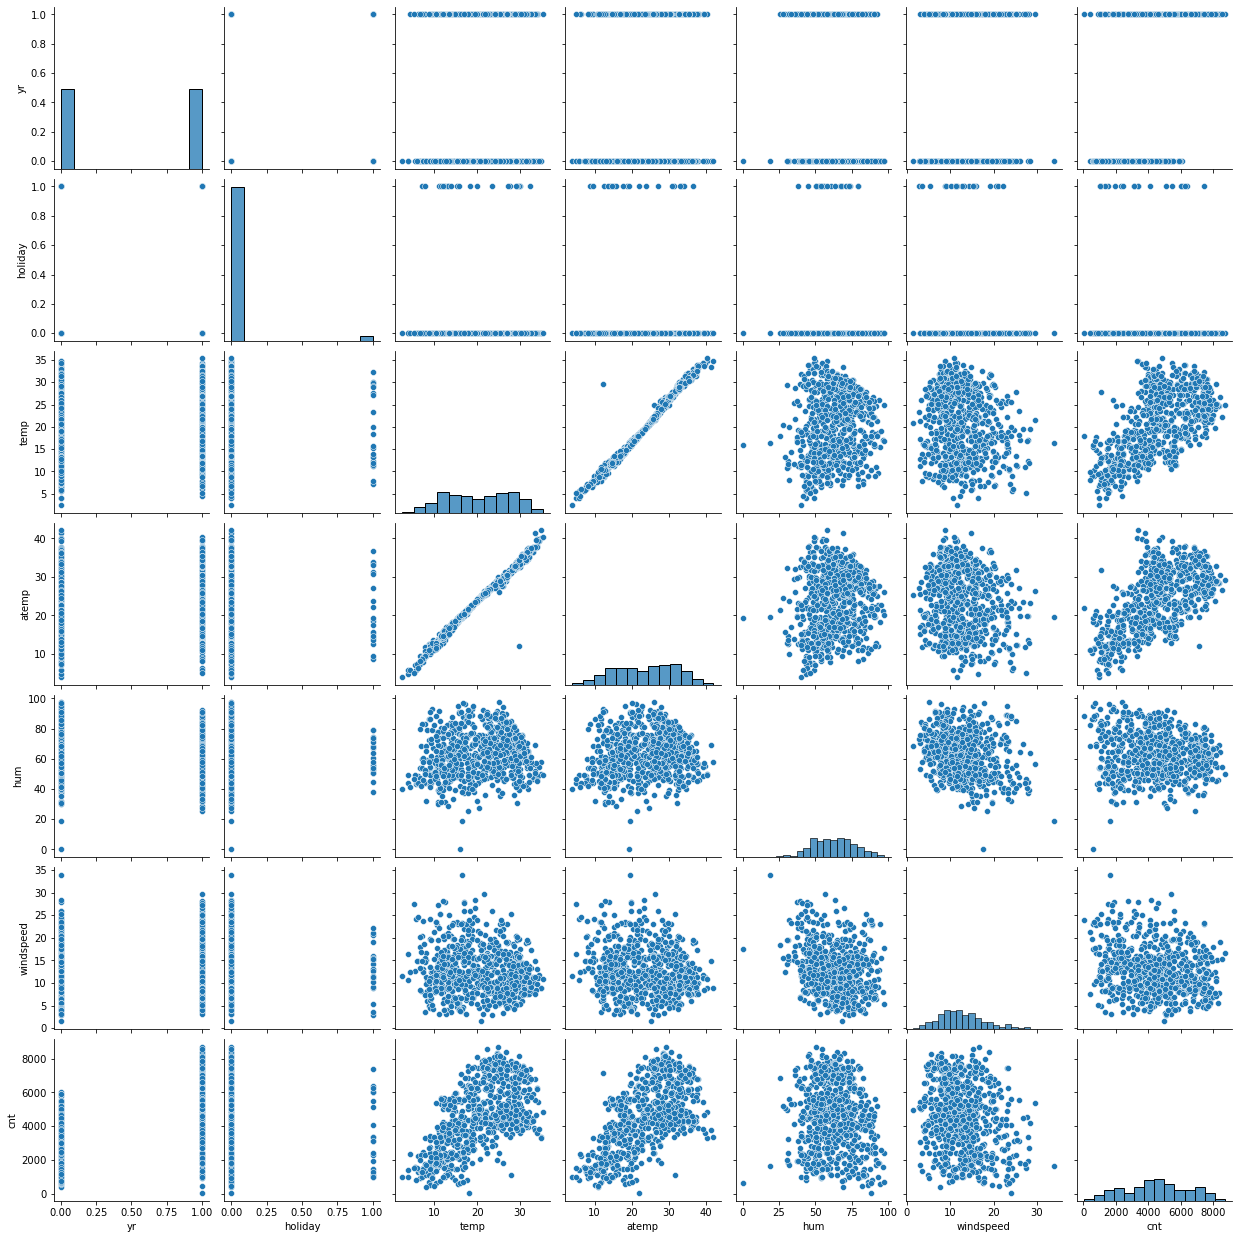

In [28]:
sns.pairplot(boombike)

<AxesSubplot:>

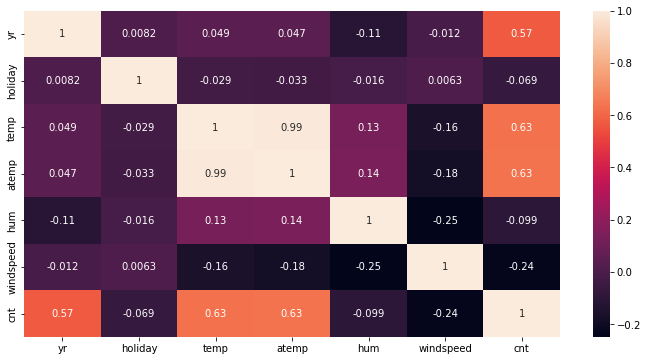

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(boombike.corr(),annot=True)

# Creating dummy variables for all categorical feature

We will create dummy variable for categorical variables
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [30]:
# we will check the datatype before converting them
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [31]:
boombike['season']=boombike['season'].astype('category')
boombike['weathersit']=boombike['weathersit'].astype('category')
boombike['mnth']=boombike['mnth'].astype('category')
boombike['weekday']=boombike['weekday'].astype('category')

In [32]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    object  
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 49.7+ KB


Datatype for 4 categorical variable is converted into 'category'

In [33]:
boombike = pd.get_dummies(boombike, drop_first=True)
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   temp                    730 non-null    float64
 3   atemp                   730 non-null    float64
 4   hum                     730 non-null    float64
 5   windspeed               730 non-null    float64
 6   cnt                     730 non-null    int64  
 7   season_spring           730 non-null    uint8  
 8   season_summer           730 non-null    uint8  
 9   season_winter           730 non-null    uint8  
 10  mnth_Aug                730 non-null    uint8  
 11  mnth_Dec                730 non-null    uint8  
 12  mnth_Feb                730 non-null    uint8  
 13  mnth_Jan                730 non-null    uint8  
 14  mnth_July               730 non-null    ui

In [34]:
boombike.shape

(730, 30)

# Divide the data to test & train

- Splitting the data for train and test
- sklearn package is used for this 

In [35]:
# check the dataset before splitting
# we will now import the sklearn package
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(boombike, train_size = 0.70, test_size = 0.30, random_state = 300)

In [36]:
#After splitting check the dataframes again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   temp                    510 non-null    float64
 3   atemp                   510 non-null    float64
 4   hum                     510 non-null    float64
 5   windspeed               510 non-null    float64
 6   cnt                     510 non-null    int64  
 7   season_spring           510 non-null    uint8  
 8   season_summer           510 non-null    uint8  
 9   season_winter           510 non-null    uint8  
 10  mnth_Aug                510 non-null    uint8  
 11  mnth_Dec                510 non-null    uint8  
 12  mnth_Feb                510 non-null    uint8  
 13  mnth_Jan                510 non-null    uint8  
 14  mnth_July               510 non-null    

In [37]:
df_train.shape

(510, 30)

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   temp                    219 non-null    float64
 3   atemp                   219 non-null    float64
 4   hum                     219 non-null    float64
 5   windspeed               219 non-null    float64
 6   cnt                     219 non-null    int64  
 7   season_spring           219 non-null    uint8  
 8   season_summer           219 non-null    uint8  
 9   season_winter           219 non-null    uint8  
 10  mnth_Aug                219 non-null    uint8  
 11  mnth_Dec                219 non-null    uint8  
 12  mnth_Feb                219 non-null    uint8  
 13  mnth_Jan                219 non-null    uint8  
 14  mnth_July               219 non-null    

In [39]:
df_test.shape

(219, 30)

# Rescaling the data

In [40]:
# we will import the MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
337,0,0,13.564153,17.45500,77.5833,5.625206,3485,0,0,1,...,0,1,0,0,0,0,0,0,0,0
547,1,0,32.048347,35.10190,44.7083,13.082889,6227,0,0,0,...,0,0,0,0,0,1,0,1,0,0
626,1,0,22.652500,27.02020,53.6667,14.416725,7591,0,0,0,...,1,0,0,0,1,0,0,1,0,0
309,0,0,14.281653,18.11790,73.4583,6.167631,3649,0,0,1,...,0,1,0,0,0,0,0,0,0,0
561,1,0,31.296653,36.20625,64.5000,11.000529,6830,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [43]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_working_day',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [44]:
# whenever there is a numeric variables we will apply scaler()
variables = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[variables] = scaler.fit_transform(df_train[variables])

In [45]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
337,0,0,0.350567,0.361341,0.799484,0.146877,0.398412,0,0,1,...,0,1,0,0,0,0,0,0,0,0
547,1,0,0.932261,0.833624,0.460712,0.412422,0.713875,0,0,0,...,0,0,0,0,0,1,0,1,0,0
626,1,0,0.636576,0.617334,0.553027,0.459915,0.870801,0,0,0,...,1,0,0,0,1,0,0,1,0,0
309,0,0,0.373147,0.379082,0.756977,0.166191,0.417280,0,0,1,...,0,1,0,0,0,0,0,0,0,0
561,1,0,0.908606,0.863180,0.664663,0.338275,0.783249,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [46]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.559712,0.525171,0.642654,0.411024,0.513308,0.245098,0.245098,0.247059,...,0.088235,0.141176,0.137255,0.149020,0.137255,0.156863,0.139216,0.682353,0.031373,0.323529
std,0.500395,0.163554,0.239185,0.221526,0.147058,0.189497,0.222862,0.430568,0.430568,0.431725,...,0.283915,0.348545,0.344454,0.356457,0.344454,0.364028,0.346511,0.466018,0.174494,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.356482,0.335987,0.525440,0.268535,0.362143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.561848,0.540014,0.641691,0.386730,0.522204,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.769634,0.709008,0.744633,0.513333,0.676542,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing data into depedent & Independent variables

In [47]:
#Dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

# RFE:Recursive feature elimination

In [48]:
# importing RFE and Linear Regression Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 13),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 7),
 ('mnth_Feb', False, 14),
 ('mnth_Jan', False, 8),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 9),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 11),
 ('workingday_working_day', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [51]:
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'mnth_July', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'workingday_working_day', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'weekday_Sat', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [53]:
X_train_rfe = X_train[column]

# Building Linear Regression Model

### Iteration 1:

In [54]:
#VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,53.10
2,temp,52.60
12,workingday_working_day,36.71
11,weekday_Sun,8.71
10,weekday_Mon,8.60
1,holiday,2.53
4,hum,1.92
6,season_spring,1.81
14,weathersit_Mist,1.60
7,mnth_July,1.32


In [55]:
#importing statsmode
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [56]:
lr1.params

const                     0.301460
yr                        0.231089
holiday                   0.030897
temp                      0.260075
atemp                     0.122500
hum                      -0.140465
windspeed                -0.144918
season_spring            -0.152756
mnth_July                -0.057043
mnth_Oct                  0.077294
mnth_Sep                  0.082958
weekday_Mon               0.057633
weekday_Sun               0.114135
workingday_working_day    0.098795
weathersit_Light Snow    -0.233037
weathersit_Mist          -0.059970
dtype: float64

In [57]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.05e-198
Time:                        21:16:21   Log-Likelihood:                 537.46
No. Observations:                 510   AIC:                            -1045.
Df Residuals:                     495   BIC:                            -981.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Result of Iteration 1

### Iteration 2:

- Removing the variable which have High P-value & High VIF

In [59]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [60]:
#VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday_working_day,36.53
10,weekday_Sun,8.67
9,weekday_Mon,8.55
1,holiday,2.53
2,temp,2.16
3,hum,1.90
5,season_spring,1.80
13,weathersit_Mist,1.60
6,mnth_July,1.32
12,weathersit_Light Snow,1.31


In [61]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Fitted model created 

In [62]:
lr2.params

const                     0.302973
yr                        0.231057
holiday                   0.030819
temp                      0.370654
hum                      -0.137437
windspeed                -0.147951
season_spring            -0.153565
mnth_July                -0.056769
mnth_Oct                  0.078340
mnth_Sep                  0.082683
weekday_Mon               0.058295
weekday_Sun               0.114632
workingday_working_day    0.099227
weathersit_Light Snow    -0.233831
weathersit_Mist          -0.060212
dtype: float64

We are checking for obtained parameters

In [63]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.20e-199
Time:                        21:28:52   Log-Likelihood:                 536.96
No. Observations:                 510   AIC:                            -1046.
Df Residuals:                     496   BIC:                            -986.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Result of Iteration 2

### Iteration 3:

- Removing the variable 'working_day' based on its high 'VIF'Value

In [65]:
X_train_new = X_train_new.drop(["workingday_working_day"], axis = 1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.40
2,temp,11.99
4,windspeed,5.00
12,weathersit_Mist,2.10
5,season_spring,2.06
0,yr,1.94
6,mnth_July,1.42
11,weathersit_Light Snow,1.25
8,mnth_Sep,1.24
9,weekday_Mon,1.22


In [67]:
X_train_lm3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
lr3.params

const                    0.402200
yr                       0.231057
holiday                 -0.068409
temp                     0.370654
hum                     -0.137437
windspeed               -0.147951
season_spring           -0.153565
mnth_July               -0.056769
mnth_Oct                 0.078340
mnth_Sep                 0.082683
weekday_Mon             -0.040932
weekday_Sun              0.015405
weathersit_Light Snow   -0.233831
weathersit_Mist         -0.060212
dtype: float64

we are checking for obtained parameters

In [69]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.20e-199
Time:                        21:48:58   Log-Likelihood:                 536.96
No. Observations:                 510   AIC:                            -1046.
Df Residuals:                     496   BIC:                            -986.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

Result of Iteration 3

### Iteration 4:

- Removing the variable 'hum' based on its Very High 'VIF' value.

In [70]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,4.83
0,yr,1.94
4,season_spring,1.69
11,weathersit_Mist,1.48
5,mnth_July,1.38
7,mnth_Sep,1.23
9,weekday_Sun,1.21
8,weekday_Mon,1.20
6,mnth_Oct,1.15


In [72]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [73]:
lr4.params

const                    0.321202
yr                       0.234375
holiday                 -0.071170
temp                     0.355582
windspeed               -0.124690
season_spring           -0.152672
mnth_July               -0.053377
mnth_Oct                 0.071634
mnth_Sep                 0.076013
weekday_Mon             -0.043849
weekday_Sun              0.015133
weathersit_Light Snow   -0.276115
weathersit_Mist         -0.083580
dtype: float64

We are checking for obtained parameters

In [74]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.06e-197
Time:                        21:57:05   Log-Likelihood:                 529.41
No. Observations:                 510   AIC:                            -1033.
Df Residuals:                     497   BIC:                            -977.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

Result of Iteration 4

### Iteration 5:

- Removing the variable 'weekday_Sun' based on its Very High p-value.

In [76]:
X_train_new = X_train_new.drop(["weekday_Sun"], axis = 1)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.78
0,yr,1.94
4,season_spring,1.68
10,weathersit_Mist,1.48
5,mnth_July,1.38
7,mnth_Sep,1.23
8,weekday_Mon,1.17
6,mnth_Oct,1.15
9,weathersit_Light Snow,1.09


In [78]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [79]:
lr5.params

const                    0.324713
yr                       0.233993
holiday                 -0.073907
temp                     0.354574
windspeed               -0.124030
season_spring           -0.153330
mnth_July               -0.053943
mnth_Oct                 0.072320
mnth_Sep                 0.076651
weekday_Mon             -0.046616
weathersit_Light Snow   -0.277356
weathersit_Mist         -0.084132
dtype: float64

In [80]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.71e-198
Time:                        22:12:29   Log-Likelihood:                 528.45
No. Observations:                 510   AIC:                            -1033.
Df Residuals:                     498   BIC:                            -982.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

### Iteration 6 

- Removing the variable 'holiday' based on its Very High p-value.

In [82]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.07
2,windspeed,4.78
0,yr,1.93
3,season_spring,1.68
9,weathersit_Mist,1.47
4,mnth_July,1.38
6,mnth_Sep,1.23
7,weekday_Mon,1.16
5,mnth_Oct,1.14
8,weathersit_Light Snow,1.08


In [84]:
X_train_lm6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [86]:
lr6.params

const                    0.323645
yr                       0.234533
temp                     0.352408
windspeed               -0.122627
season_spring           -0.155061
mnth_July               -0.053771
mnth_Oct                 0.070109
mnth_Sep                 0.075107
weekday_Mon             -0.044242
weathersit_Light Snow   -0.275460
weathersit_Mist         -0.084909
dtype: float64

In [87]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     279.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.35e-197
Time:                        22:47:24   Log-Likelihood:                 523.52
No. Observations:                 510   AIC:                            -1025.
Df Residuals:                     499   BIC:                            -978.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

### Iteration 7:

- Removing the variable 'mnth_July' based on its Very High p-value.

In [88]:
X_train_new = X_train_new.drop(["mnth_July"], axis = 1)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.67
1,temp,4.05
0,yr,1.93
3,season_spring,1.68
8,weathersit_Mist,1.46
5,mnth_Sep,1.17
6,weekday_Mon,1.16
4,mnth_Oct,1.12
7,weathersit_Light Snow,1.08


In [90]:
X_train_lm7 = sm.add_constant(X_train_new)

lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [91]:
lr7.params

const                    0.334737
yr                       0.235396
temp                     0.320428
windspeed               -0.119255
season_spring           -0.159175
mnth_Oct                 0.074623
mnth_Sep                 0.084923
weekday_Mon             -0.045800
weathersit_Light Snow   -0.274728
weathersit_Mist         -0.082948
dtype: float64

In [92]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     303.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.90e-196
Time:                        22:52:29   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -1016.
Df Residuals:                     500   BIC:                            -973.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

# Final Model Interpretation

- Hypothesis Testing

Ir7 Model Coefficient Values

- const                    0.334737
- yr                       0.235396
- temp                     0.320428
- windspeed               -0.119255
- season_spring           -0.159175
- mnth_Oct                 0.074623
- mnth_Sep                 0.084923
- weekday_Mon             -0.045800
- weathersit_Light Snow   -0.274728
- weathersit_Mist         -0.082948

From the lr7 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

### F-statistics

F-Statistics is used for testing the overall significance of the Model

- F-statistic: 303.1
- Prob (F-statistic): 3.90e-196

The F-Statistics value of 303 (which is greater than 1)  and the p-value of '~0.0000' states that the overall model is significant

# Assumption

In [93]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

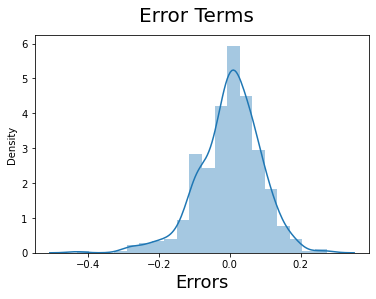

In [94]:
res = y_train-y_train_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

There is a linear relationship between X and Y 

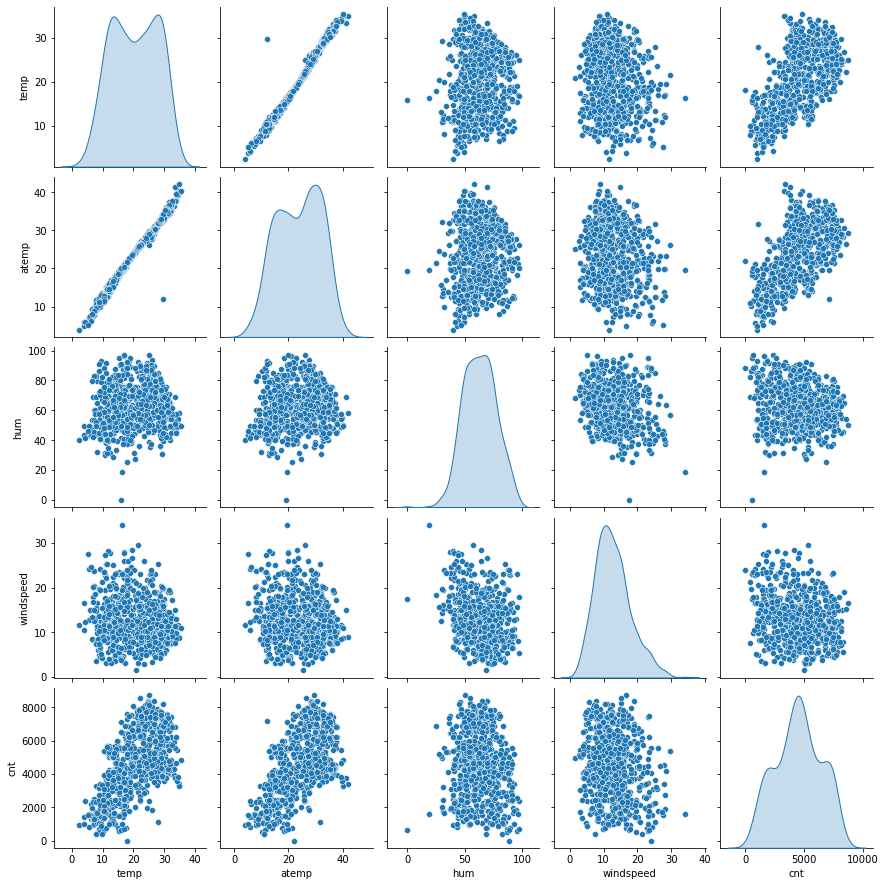

In [95]:
boombike=boombike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(boombike, diag_kind='kde')
plt.show()

# Multicollinearity

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.67
1,temp,4.05
0,yr,1.93
3,season_spring,1.68
8,weathersit_Mist,1.46
5,mnth_Sep,1.17
6,weekday_Mon,1.16
4,mnth_Oct,1.12
7,weathersit_Light Snow,1.08


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# Dividing into X_Test and y_Test

In [98]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    int64  
 1   holiday                 219 non-null    int64  
 2   temp                    219 non-null    float64
 3   atemp                   219 non-null    float64
 4   hum                     219 non-null    float64
 5   windspeed               219 non-null    float64
 6   season_spring           219 non-null    uint8  
 7   season_summer           219 non-null    uint8  
 8   season_winter           219 non-null    uint8  
 9   mnth_Aug                219 non-null    uint8  
 10  mnth_Dec                219 non-null    uint8  
 11  mnth_Feb                219 non-null    uint8  
 12  mnth_Jan                219 non-null    uint8  
 13  mnth_July               219 non-null    uint8  
 14  mnth_June               219 non-null    

In [103]:
col1=X_train_new.columns
X_test=X_test[col1]

X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   temp                   219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   mnth_Oct               219 non-null    uint8  
 6   mnth_Sep               219 non-null    uint8  
 7   weekday_Mon            219 non-null    uint8  
 8   weathersit_Light Snow  219 non-null    uint8  
 9   weathersit_Mist        219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [104]:
y_pred = lr7.predict(X_test_lm7)

# Model Evaluation

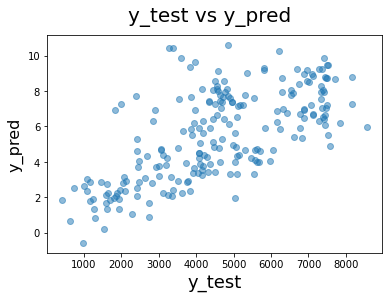

In [105]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R-square value for test 

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-5.550905931183103